## **Task 2 **

In [ ]:
## Downloading Dataset from roboflow in VOC format

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PssQwzgHzOfxbDI6JfAa")
project = rf.workspace("national-university-fast").project("stationary-items-dataset")
dataset = project.version(3).download("voc")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=61b1707fcecdc5208573018e7837ac92b26b23f84f29558c0c2ed717f792acde
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
    

loading Roboflow workspace...
loading Roboflow project...

In [ ]:
## Looking at dataset descriptions
dataset_path = '/content/Stationary-Items-Dataset-3'

import os
train_images = os.listdir(os.path.join(dataset_path, 'train'))
print('Total Train Images: ', len(train_images))

valid_images = os.listdir(os.path.join(dataset_path, 'valid'))
print('Total Train Images: ', len(valid_images))

test_images = os.listdir(os.path.join(dataset_path, 'test'))
print('Total Train Images: ', len(test_images))

total_images = len(train_images) + len(valid_images) + len(test_images)
print("Total Images: ", total_images)

In [ ]:
## Installing github yolov5 repo
try:
  !git clone https://github.com/ultralytics/yolov5
except:
  pass
%cd /content/yolov5
!pip install -r requirements.txt


In [ ]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

random.seed(1234)

In [ ]:
# !pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PssQwzgHzOfxbDI6JfAa")
project = rf.workspace("national-university-fast").project("stationary-items-dataset")
dataset = project.version(3).download("yolov5")

In [ ]:
print(dataset.location)

/content/yolov5/Stationary-Items-Dataset-3


In [ ]:
!python train.py --img 640 --batch 32 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt 

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Stationary-Items-Dataset-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, 

Mounted at /content/drive


In [ ]:
!cp /content/yolov5/runs/train/exp/weights/best.pt /content/drive/MyDrive/yolov5_stationary_DL

# Evaluate

In [ ]:
!python detect.py --source {dataset.location}/test/images --weights /content/drive/MyDrive/yolov5_stationary_DL/best.pt --conf 0.15

detect: weights=['/content/drive/MyDrive/yolov5_stationary_DL/best.pt'], source=/content/yolov5/Stationary-Items-Dataset-3/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.15, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-162-gc3e4e94 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
image 1/110 /content/yolov5/Stationary-Items-Dataset-3/test/images/21i2279_Ballpoint-13-_jpg.rf.296065a562ad1dc049570207f4457338.jpg: 640x640 1 ball point, 11.6ms
image 2/110 /content/yolov5/Stationary-Items-Dataset-3/test/im

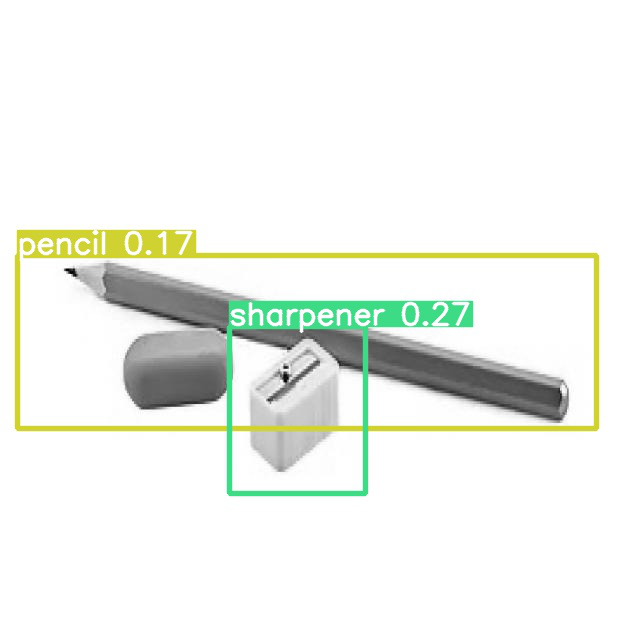

In [ ]:
detections_dir = "/content/yolov5/runs/detect/exp2"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
display(random_detection_image)

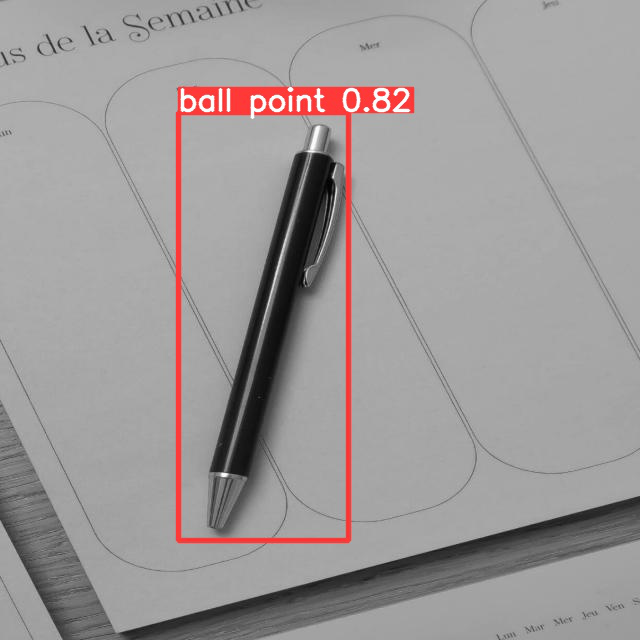

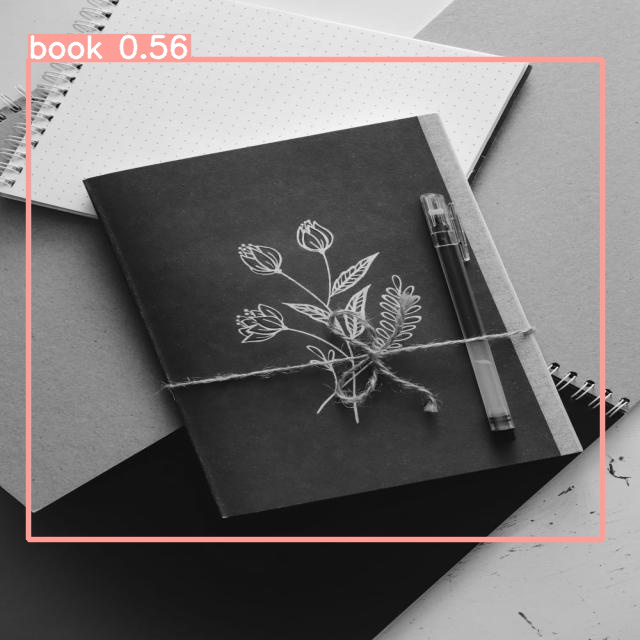

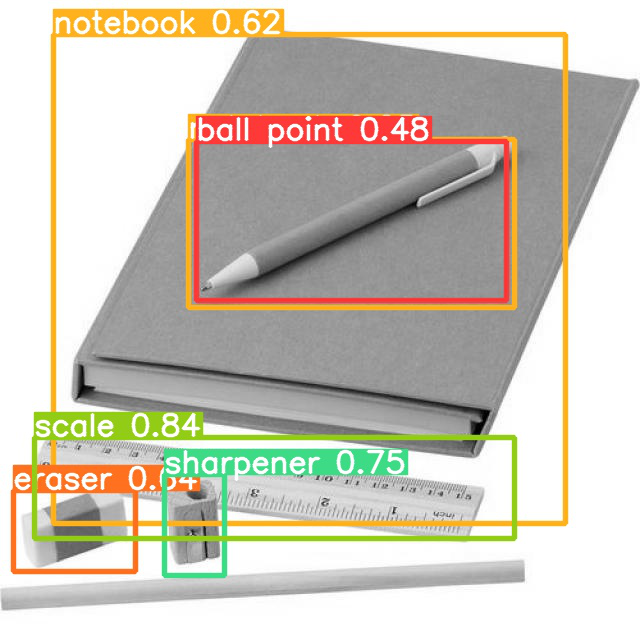

In [ ]:
## Testing
# Load image
from PIL import Image
img = Image.open('/content/yolov5/runs/detect/exp2/21i2279_Ballpoint-13-_jpg.rf.296065a562ad1dc049570207f4457338.jpg')
img2 = Image.open('/content/yolov5/runs/detect/exp2/21i2279_Notebook-43-_jpg.rf.237a7f2950b90bc58a8bf1996e59667e.jpg')
img3 = Image.open('/content/yolov5/runs/detect/exp2/I222840_25_jpg.rf.f8a8b831540cd6dbf60013b224c81f87.jpg')

# Display image
display(img)
display(img2)
display(img3)

## GUI

In [ ]:
# books, notebooks, erasers, scales, pencils, and sharpeners,ballpoints
# ,pointers

In [ ]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.0 MB/s eta 0:00:00
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.3/956.3 kB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.0/101.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/yolov5_stationary_DL/best.pt')

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-5-8 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:

print("Each element Price")

element_price = {
    'ball point': 10,
    'book': 200,
    'eraser': 5,
    'notebook': 50,
    'pencil': 8,
    'pointer': 20,
    'scale': 15,
    'sharpener': 5
}

print(element_price)

Each element Price
{'ball point': 10, 'book': 200, 'eraser': 5, 'notebook': 50, 'pencil': 8, 'pointer': 20, 'scale': 15, 'sharpener': 5}


In [ ]:
# Import the necessary libraries
import torch
import cv2
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd


# Create the GUI widgets
upload = widgets.FileUpload()
prediction_type = widgets.Dropdown(
    options=['Image', 'Video'],
    value='Image',
    description='Prediction Type:',
    disabled=False,
)
confidence_threshold = widgets.FloatSlider(
    value=0.1,
    min=0.0,
    max=1.0,
    step=0.05,
    description='Confidence Threshold:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f',
)
prediction_button = widgets.Button(description='Predict')


# Define the function to predict the image or video
def predict_image_or_video(b):
    # Get the content of the uploaded file

    count_price = [0] * 8
    count_item = [0] * 8

    
    content = list(upload.value.values())[0]['content']
    # Create a temporary file to store the uploaded file
    with open('temp_file', 'wb') as f:
        f.write(content)
    # Predict the image or video
    if prediction_type.value == 'Image':
        # Load the image
        image = Image.open('temp_file')
        # Predict the image
        results = model(image)
        class_ids = results.xyxy[0][:, 5].tolist()
        for class_id in class_ids:
          class_id = int(class_id)
          count_item[class_id] +=1
          count_price[class_id] += element_price[model.names[int(class_id)]]
        
        bill = pd.DataFrame({"Item ":list(element_price.keys()), "Count":count_item, "Price":count_price})
        print(bill)
        print('Total Price: ', sum(count_price))

        img = results.render()
        with open('output.png', 'wb') as f:
            np.save(f, img[0])
        # # Display the output image
        with open('output.png', 'rb') as f:
            output_image = f.read()

        display(Image.fromarray(img[0]))
       
        
    else:
        # Open the video file
        cap = cv2.VideoCapture('temp_file')
        # Get the video writer
        fourcc = cv2.VideoWriter_fourcc(*'mp4v')
        fps = cap.get(cv2.CAP_PROP_FPS)
        size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
        out = cv2.VideoWriter('output.mp4', fourcc, fps, size)
        # Loop through the video frames
        prev_class_ids = None
        while True:
            for i in range(10):
              cap.grab()
            ret, frame = cap.read()
            if not ret:
                break
            # Convert the frame to PIL image
            image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            # Predict the image
            results = model(image)
            class_ids = results.xyxy[0][:, 5].tolist()
            if not prev_class_ids == class_ids:
              
              for class_id in class_ids:
                class_id = int(class_id)
                count_item[class_id] +=1
                count_price[class_id] += element_price[model.names[int(class_id)]]
                prev_class_ids = class_ids
            
            # Draw the bounding boxes on the frame
            boxes = results.xyxy[0].detach().cpu().numpy()
            for box in boxes:
                if box[4] > confidence_threshold.value:
                    cv2.rectangle(frame, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
            # Convert the frame back to BGR format and write it to the output video file
            out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
        # Release the video capture and video writer
        bill = pd.DataFrame({"Item ":list(element_price.keys()), "Count":count_item, "Price":count_price})
        print(bill)
        print('Total Price: ', sum(count_price))
        cap.release()
        out.release()
        # Display the output video
        with open('output.mp4', 'rb') as f:
            video = f.read()
        display(widgets.Video(
            value=video,
            format='mp4',
            width=500,
            height=500,
        ))

# Attach the function to the prediction button
prediction_button.on_click(predict_image_or_video)

# Display the GUI widgets
display(upload)
display(prediction_type)
display(confidence_threshold)
display(prediction_button)


FileUpload(value={}, description='Upload')

Dropdown(description='Prediction Type:', options=('Image', 'Video'), value='Image')

FloatSlider(value=0.1, continuous_update=False, description='Confidence Threshold:', max=1.0, step=0.05)

Button(description='Predict', style=ButtonStyle())